In [5]:
### Resnet18 BCE LOSS

In [ ]:
from google.colab import drive
drive.mount('./gdrive')


In [0]:
#!unzip "./gdrive/My Drive/A_05_Part_02_Dataset.zip" -d "./gdrive/My Drive/Assignment_dataset"

In [31]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import sys

In [0]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader ,random_split
from torch.nn import functional as F
import torch.optim as optim


In [0]:
#dir(models)

In [35]:
torch.__version__

'1.5.0+cu101'

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
data_dir_tr = "./gdrive/My Drive/Assign_5_Augm/train_aug"
data_dir_vl = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset"

### 2. Create PyTorch data generators

In [38]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
batch=64
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(data_dir_vl+'/Train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(data_dir_vl+'/Validation', data_transforms['validation'])
}
#image_datasets['validation'].class_to_idx={'covid-19': [1,0,0], 'normal': [0,1,0], 'pneumonia': [0,0,1]}
A=image_datasets['validation']
print(A)
dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4),
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4)
}
print(image_datasets['train'].class_to_idx)


def one_hot(x, class_count):
    return torch.eye(class_count).to(device)[x,:]
len(image_datasets['train'])
#for inputs, labels in dataloaders['validation']:
 #print(labels.data)
 #x = labels
 #class_count = 3
 
 #y = torch.LongTensor(128,1).random_() % 3
# One hot encoding buffer that you create out of the loop and just keep reusing
 #y_onehot = torch.FloatTensor(batch, 3)
 #y_onehot.zero_()
 #y_onehot.scatter_(1, labels, 1)t5
 #print(one_hot(x,class_count))
#list(zip(image_datasets['train'].class_to_idx))
#len(image_datasets['validation'])

Dataset ImageFolder
    Number of datapoints: 628
    Root location: ./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/Validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'covid-19': 0, 'normal': 1, 'pneumonia': 2}


6200

### 3. Create the network

In [39]:
model = models.resnet18(pretrained=True).to(device)
print(model)
num_features = model.fc.in_features
for param in model.parameters():
  param.requires_grad=False
model.fc=nn.Sequential( nn.Linear(num_features,5000),
                               nn.LeakyReLU(),
                                #nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,1200),
                                nn.LeakyReLU(),
                                nn.Linear(1200,3)).to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
pos_weight = torch.ones([batch]).to(device)
criterion=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#optimizer = optim.SGD(model.fc.parameters(),lr=0.001, momentum=0.9)
for param in filter(lambda p: p.requires_grad, model.parameters()):
  print(param.requires_grad)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)

True
True
True
True
True
True


### 4. Train the model

In [0]:
#batch=128
def train_model(model, Focalloss, optimizer, num_epochs=3):
    loss_train=[]
    loss_val=[]
    acc_train=[]
    acc_val=[]
    Epochs=[]
    for epoch in range(num_epochs):
        print('Epoch ' ,epoch+1,'/',num_epochs)
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            i=0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # print(labels)
                # One hot encoding buffer that you create out of the loop and just keep reusing
                #y_onehot = torch.FloatTensor(batch, 3).to(device)
                #y_onehot.zero_().to(device)
                #y_onehot.scatter_(1, labels, 1).to(device)
                onehot=one_hot(labels,3)
                #onehot[onehot[0:batch]==torch.FloatTensor([1,0,0]).to(device)]=(torch.FloatTensor([1,0,1]).clone()).to(device)
                #y[y[0:200]==torch.FloatTensor([1., 0., 0.]).to(device)]=torch.FloatTensor([1., 0., 1.]).to(device)
                for a in range(len(labels)):
                    if torch.equal(onehot[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
                        onehot[a]=torch.FloatTensor([1., 0., 1.]).to(device)
                #for i in range(len(onehot)):
                #print(onehot[:])
                #print(onehot.dtype,'hotcoding')
                i=i+1
                #for inputs, labels in dataloaders['validation']:
                #print(labels.data)


                outputs = model(inputs)
                #print(outputs.shape)
                loss = criterion(outputs.T, onehot.T)
                #print(loss,'  loss')
                print('\r ',i,'  ','loss  ',loss,end='')
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                m=torch.nn.Sigmoid()
                preds = m(outputs).data>0.5
                #print(preds.shape,'\n')
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds[0:batch] == (onehot[0:batch]))/3
            
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.float() / len(image_datasets[phase])
            if phase == 'train':
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
                
            #Epochs,append(epoch_acc)

            print('  ','{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss.item(),
                                                        epoch_acc.item()))
    
    A=plt.figure(1)
    #plt.plot(it,Loss,label='CE')
    plt.plot(range(num_epochs),acc_train,'r--',label='Training Accuracy')
    plt.plot(range(num_epochs),acc_val,'g--',label='Val Accuracy')
    #print(Loss)
    A.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    g = plt.figure(2)
    plt.plot(range(num_epochs),loss_train,'r--',label='Training Loss')
    plt.plot(range(num_epochs),loss_val,'g--',label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    g.legend()
    #g.savefig(('LOss'.png'),dpi=1200)        
    return model


In [42]:
y = torch.FloatTensor(200,3).random_().to(device)
#print(y)
print(y[0:5])
q =[[0,1,2],[3,0,4],[5,6,0]]
tense_tensor = torch.tensor(q)


tensor([[ 5810157., 12278566., 13302653.],
        [ 4723374., 10650940.,  6741103.],
        [12138555., 10322105.,  4596658.],
        [ 1828697.,  3254083.,  7719435.],
        [ 5018995.,  5239599.,  8348922.]], device='cuda:0')


In [0]:

#y[y[0:200]==torch.FloatTensor([16583221., 12498836., 11103416.])]=torch.FloatTensor([1.,  0., 1.]).to(device)
#print(torch.where(y[0:200]==torch.FloatTensor([ 803131.,  5802761.,   894371.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),y))

In [44]:
len(image_datasets['train'])

6200

[link text](https://)

Epoch  1 / 30
----------
  96    loss   tensor(0.2535, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.3354, acc: 0.8455
  9    loss   tensor(0.2251, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.2626, acc: 0.8137
Epoch  2 / 30
----------
  96    loss   tensor(0.2912, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.2631, acc: 0.8785
  9    loss   tensor(0.2859, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.3206, acc: 0.7787
Epoch  3 / 30
----------
  96    loss   tensor(0.2062, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.2506, acc: 0.8882
  9    loss   tensor(0.2887, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.2517, acc: 0.8232
Epoch  4 / 30
----------
  96    loss   tensor(0.1340, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.237

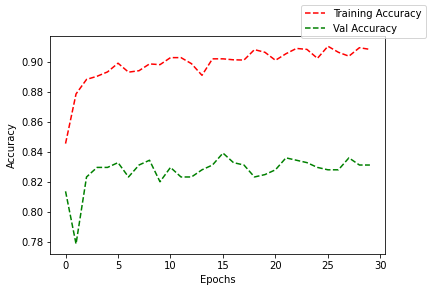

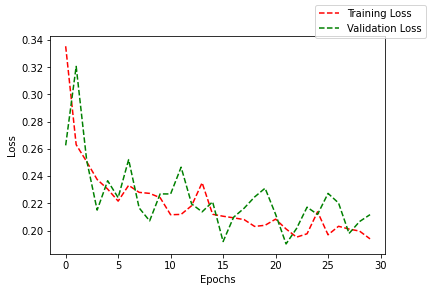

In [45]:
model_trained = train_model(model, criterion, optimizer, num_epochs=30)

### 5. Save and load the model

In [0]:
torch.save(model_trained.state_dict(), './gdrive/My Drive/Assignment_05/Final_Resnet_BCE_LOSS.h5')

In [53]:
model = models.resnet18(pretrained=True).to(device)
num_features = model.fc.in_features
model.fc=nn.Sequential( nn.Linear(num_features,5000),
                               nn.Sigmoid(),
                                #nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,1200),
                                nn.ReLU(),
                                nn.Linear(1200,3),nn.Sigmoid()).to(device)

model.load_state_dict(torch.load('./gdrive/My Drive/Assignment_05/Final_Resnet_BCE_LOSS.h5'))
model.eval()
print('testing')

testing


### 6. Make predictions on sample test images

In [54]:
import torch
from torchvision import datasets

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/test"
dataset = ImageFolderWithPaths(data_dir) # our custom dataset
dataloader = DataLoader(dataset)
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_data = ImageFolderWithPaths(data_dir_vl + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

class_names = test_data.classes
score=[]
name=[]
print(class_names)
for inputs, labels, paths in testloader:
    # use the above variables freely
    model.eval()
    nm=os.path.basename(os.path.normpath(paths[0]))
    image=inputs.to(device)
    outputs = (model(image))
    gt=outputs.detach().to('cpu').numpy()
    score.append((gt[0]>0.5)*1)
    name.append(nm)
a=np.matrix(name)
b=np.asarray(score)#.reshape(0,-1)
res = np.concatenate((a.T, b[:,0:1]), axis=1)
res = np.concatenate((res,b[:,2:3]),axis=1)
res = np.concatenate((res,b[:,1:2]),axis=1)
print(res)
np.savetxt("./gdrive/My Drive/Assignment_05/Final_Resnet_BCE.csv", res,delimiter=',',  fmt='%s')

['Test']
[['0.png' '1' '0' '1']
 ['1.png' '1' '0' '1']
 ['10.png' '1' '0' '1']
 ...
 ['97.png' '1' '1' '0']
 ['98.png' '1' '0' '0']
 ['99.png' '1' '0' '1']]


In [60]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=[]
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
Av=np.zeros((nb_classes,2,2))
acc=0
i=0
with torch.no_grad():
    for inputs, labels in dataloaders['validation']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)  #print(classes)
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        i=1+i
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        Av=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+Av
        B.append(f1_score(classes.numpy(), pred.numpy(), average='samples'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
print('Validation data ')
print(A)
print('F1 score')
print(np.mean(B))

Validation data 
[[[ 66. 483.]
  [  1.  26.]]

 [[196.  14.]
  [112. 254.]]

 [[321.  45.]
  [ 27. 183.]]]
F1 score
0.5517939814814814


[[ 65. 489.]
 [  1.  21.]]


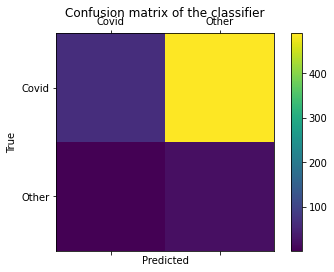

[[188.  15.]
 [110. 263.]]


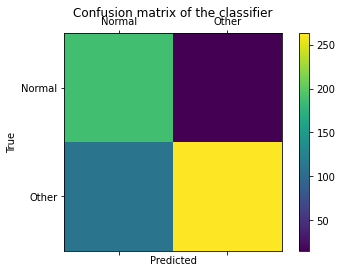

[[324.  49.]
 [ 29. 174.]]


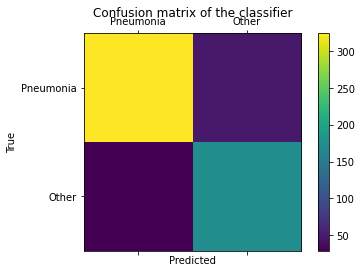

In [61]:
labels = ['Covid', 'Other']
cm = Av[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = Av[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = Av[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=0
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
At=np.zeros((nb_classes,2,2))
acc=0
i=0
B=[]
with torch.no_grad():
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=torch.where(onehot[0:batch]==torch.FloatTensor([ 1.,  0.,   0.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),onehot)
        #print(classes)
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        At=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+At
        B.append(f1_score(classes.numpy(), pred.numpy(), average='macro'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
        #i=i+1

#print('train accuracy', '    ',  acc/i)

In [63]:
print('train data ')
print(At)
print('F1 score')
print(np.mean(B))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
plt.show()

train data 
[[[ 66. 483.]
  [  1.  26.]]

 [[196.  14.]
  [112. 254.]]

 [[321.  45.]
  [ 27. 183.]]]
F1 score
0.4745731387180933


[[ 692. 5254.]
 [   0.  198.]]


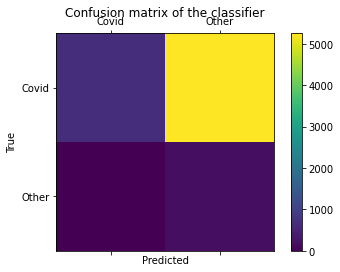

[[2078.   96.]
 [1300. 2670.]]


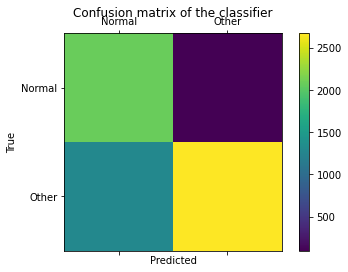

[[   0.    0.]
 [3721. 2423.]]


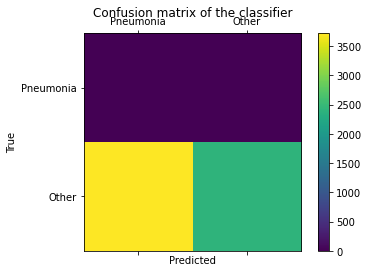

In [64]:
labels = ['Covid', 'Other']
cm = At[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = At[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = At[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 1. Import dependencies

In [21]:
from google.colab import drive
drive.mount('./gdrive')


Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [0]:
#!unzip "./gdrive/My Drive/A_05_Part_02_Dataset.zip" -d "./gdrive/My Drive/Assignment_dataset"

In [23]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import sys

In [0]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader ,random_split
from torch.nn import functional as F
import torch.optim as optim


In [0]:
#dir(models)

In [27]:
torch.__version__

'1.5.0+cu101'

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
data_dir_tr = "./gdrive/My Drive/Assign_5_Augm/train_aug"
data_dir_vl = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset"

### 2. Create PyTorch data generators

In [71]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
batch=64
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(data_dir_vl+'/Train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(data_dir_vl+'/Validation', data_transforms['validation'])
}
#image_datasets['validation'].class_to_idx={'covid-19': [1,0,0], 'normal': [0,1,0], 'pneumonia': [0,0,1]}
A=image_datasets['validation']
print(A)
dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4),
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4)
}
print(image_datasets['train'].class_to_idx)


def one_hot(x, class_count):
    return torch.eye(class_count).to(device)[x,:]
len(image_datasets['train'])
#for inputs, labels in dataloaders['validation']:
 #print(labels.data)
 #x = labels
 #class_count = 3
 #print(labels)
 #onehot=one_hot(labels,3)
 #onehot[torch.equal(onehot[0:batch],torch.FloatTensor([1,0,0]).to(device))]=(torch.FloatTensor([1,0,1]).clone()).to(device)
                #y[y[0:200]==torch.FloatTensor([1., 0., 0.]).to(device)]=torch.FloatTensor([1., 0., 1.]).to(device)
 #print(onehot)
 #onehot=torch.where(onehot[0:batch] == torch.FloatTensor([ 1.,  0.,   0.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),onehot)
 #onehot=torch.where(torch.eq(onehot[0:batch],torch.FloatTensor([ 1.,  0.,   0.]).to(device)),torch.FloatTensor([1.,  0., 1.]).to(device),onehot)
 #tensor[tensor==4] = sixteens_tensor.clone()
   
 #for a in range(len(labels)):
  #   if torch.equal(onehot[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
   #    onehot[a]=torch.FloatTensor([1., 0., 1.]).to(device)

 #print(onehot)
 #y = torch.LongTensor(128,1).random_() % 3
# One hot encoding buffer that you create out of the loop and just keep reusing
 #y_onehot = torch.FloatTensor(batch, 3)
 #y_onehot.zero_()
 #y_onehot.scatter_(1, labels, 1)t5
 #print(one_hot(x,class_count))
#list(zip(image_datasets['train'].class_to_idx))
#len(image_datasets['validation'])

Dataset ImageFolder
    Number of datapoints: 628
    Root location: ./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/Validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'covid-19': 0, 'normal': 1, 'pneumonia': 2}


6200

### 3. Create the network

In [72]:
model = models.resnet18(pretrained=True).to(device)
print(model)
num_features = model.fc.in_features
for param in model.parameters():
  param.requires_grad=False
model.fc=nn.Sequential( nn.Linear(num_features,5000),
                               nn.LeakyReLU(),
                                #nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,1200),
                                nn.LeakyReLU(),
                                nn.Linear(1200,3)).to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
def Focalloss(x,y,alpha=0.3,gamma=2):
  pos_weight = torch.ones([batch]).to(device)
  BCE=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
  BCE_LOSS=BCE(x,y)
  pt=torch.exp(-BCE_LOSS)
  FL=alpha*BCE_LOSS*(1-pt)**gamma
  return FL




In [74]:
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.fc.parameters(),lr=0.001, momentum=0.9)
for param in filter(lambda p: p.requires_grad, model.parameters()):
  print(param.requires_grad)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)

True
True
True
True
True
True


### 4. Train the model

In [0]:
#batch=128
def train_model(model, Focalloss, optimizer, num_epochs=3):
    loss_train=[]
    loss_val=[]
    acc_train=[]
    acc_val=[]
    Epochs=[]
    for epoch in range(num_epochs):
        print('Epoch ' ,epoch+1,'/',num_epochs)
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            i=0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # print(labels)
                # One hot encoding buffer that you create out of the loop and just keep reusing
                #y_onehot = torch.FloatTensor(batch, 3).to(device)
                #y_onehot.zero_().to(device)
                #y_onehot.scatter_(1, labels, 1).to(device)
                onehot=one_hot(labels,3)
                #onehot[onehot[0:batch]==torch.FloatTensor([1,0,0]).to(device)]=(torch.FloatTensor([1,0,1]).clone()).to(device)
                #y[y[0:200]==torch.FloatTensor([1., 0., 0.]).to(device)]=torch.FloatTensor([1., 0., 1.]).to(device)
                for a in range(len(labels)):
                    if torch.equal(onehot[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
                        onehot[a]=torch.FloatTensor([1., 0., 1.]).to(device)
                #for i in range(len(onehot)):
                #print(onehot[:])
                #print(onehot.dtype,'hotcoding')
                i=i+1
                #for inputs, labels in dataloaders['validation']:
                #print(labels.data)


                outputs = model(inputs)
                #print(outputs.shape)
                loss = Focalloss(outputs.T, onehot.T,alpha=0.7,gamma=1.5)
                #print(loss,'  loss')
                print('\r ',i,'  ','loss  ',loss,end='')
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                m=torch.nn.Sigmoid()
                preds = m(outputs).data>0.5
                #print(preds.shape,'\n')
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds[0:batch] == (onehot[0:batch]))/3
            
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.float() / len(image_datasets[phase])
            if phase == 'train':
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
                
            #Epochs,append(epoch_acc)

            print('  ','{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss.item(),
                                                        epoch_acc.item()))
    
    A=plt.figure(1)
    #plt.plot(it,Loss,label='CE')
    plt.plot(range(num_epochs),acc_train,'r--',label='Training Accuracy')
    plt.plot(range(num_epochs),acc_val,'g--',label='Val Accuracy')
    #print(Loss)
    A.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    g = plt.figure(2)
    plt.plot(range(num_epochs),loss_train,'r--',label='Training Loss')
    plt.plot(range(num_epochs),loss_val,'g--',label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    g.legend()
    #g.savefig(('LOss'.png'),dpi=1200)        
    return model


In [77]:
y = torch.FloatTensor(200,3).random_().to(device)
#print(y)
print(y[0:5])
q =[[0,1,2],[3,0,4],[5,6,0]]
tense_tensor = torch.tensor(q)


tensor([[ 3221520., 16492322.,   836999.],
        [ 6525697.,  7119278., 15703674.],
        [ 8839566., 13647771.,  5243800.],
        [ 5908978., 16099398., 14026799.],
        [16426488., 13958844., 16268525.]], device='cuda:0')


In [0]:

#y[y[0:200]==torch.FloatTensor([16583221., 12498836., 11103416.])]=torch.FloatTensor([1.,  0., 1.]).to(device)
#print(torch.where(y[0:200]==torch.FloatTensor([ 803131.,  5802761.,   894371.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),y))

In [0]:
len(image_datasets['train'])

[link text](https://)

Epoch  1 / 30
----------
  96    loss   tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0442, acc: 0.8513
  9    loss   tensor(0.0283, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0199, acc: 0.8201
Epoch  2 / 30
----------
  96    loss   tensor(0.0231, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0239, acc: 0.8795
  9    loss   tensor(0.0296, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0229, acc: 0.8264
Epoch  3 / 30
----------
  96    loss   tensor(0.0418, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0164, acc: 0.8956
  9    loss   tensor(0.0202, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0183, acc: 0.8280
Epoch  4 / 30
----------
  96    loss   tensor(0.0184, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0172, acc: 0.8911
  9    loss   tensor(0.0213, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0162, acc: 0.8248
Epoch  5 / 30
----------
  96    loss   tens

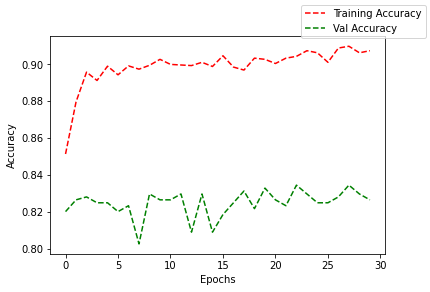

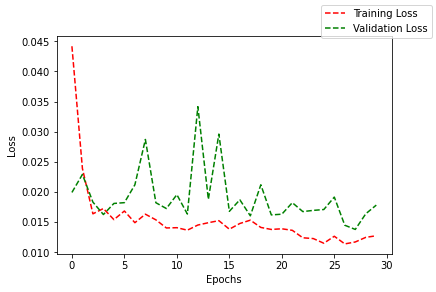

In [78]:
model_trained = train_model(model, Focalloss, optimizer, num_epochs=30)

### 5. Save and load the model

In [0]:
torch.save(model_trained.state_dict(), './gdrive/My Drive/Assignment_05/Final_Resnet_Focal_loss.h5')

In [81]:
model = models.resnet18(pretrained=True).to(device)
num_features = model.fc.in_features
model.fc=nn.Sequential( nn.Linear(num_features,5000),
                               nn.LeakyReLU(),
                                #nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,1200),
                                nn.LeakyReLU(),
                                nn.Linear(1200,3)).to(device)

model.load_state_dict(torch.load('./gdrive/My Drive/Assignment_05/Final_Resnet_Focal_loss.h5'))
model.eval()
print('testing')

testing


### 6. Make predictions on sample test images

In [82]:
import torch
from torchvision import datasets

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/test"
dataset = ImageFolderWithPaths(data_dir) # our custom dataset
dataloader = DataLoader(dataset)
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_data = ImageFolderWithPaths(data_dir_vl + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

class_names = test_data.classes
score=[]
name=[]
print(class_names)
for inputs, labels, paths in testloader:
    # use the above variables freely
    model.eval()
    nm=os.path.basename(os.path.normpath(paths[0]))
    image=inputs.to(device)
    outputs = (model(image))
    gt=outputs.detach().to('cpu').numpy()
    score.append((gt[0]>0.5)*1)
    name.append(nm)
a=np.matrix(name)
b=np.asarray(score)#.reshape(0,-1)
res = np.concatenate((a.T, b[:,0:1]), axis=1)
res = np.concatenate((res,b[:,2:3]),axis=1)
res = np.concatenate((res,b[:,1:2]),axis=1)
print(res)
np.savetxt("./gdrive/My Drive/Assignment_05/Final_Resnet_FL.csv", res,delimiter=',',  fmt='%s')

['Test']
[['0.png' '0' '0' '1']
 ['1.png' '0' '0' '1']
 ['10.png' '0' '0' '1']
 ...
 ['97.png' '0' '1' '0']
 ['98.png' '0' '0' '1']
 ['99.png' '0' '0' '1']]


In [105]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=[]
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
Av=np.zeros((nb_classes,2,2))
acc=0
i=0
with torch.no_grad():
    for inputs, labels in dataloaders['validation']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)        #print(classes)
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        i=1+i
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        Av=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+Av
        B.append(f1_score(classes.numpy(), pred.numpy(), average='samples'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
print('Validation data ')
print(A)
print('F1 score')
print(np.mean(B))

Validation data 
[[[549.   0.]
  [ 21.   6.]]

 [[183.  24.]
  [ 42. 327.]]

 [[346.  23.]
  [ 41. 166.]]]
F1 score
0.8570601851851852


[[549.   0.]
 [ 21.   6.]]


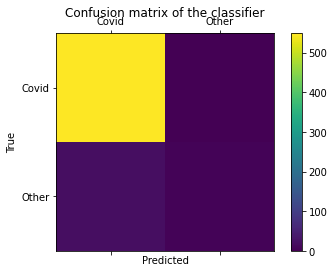

[[185.  27.]
 [ 37. 327.]]


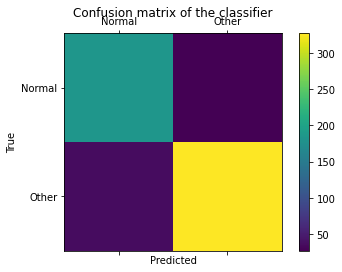

[[343.  21.]
 [ 43. 169.]]


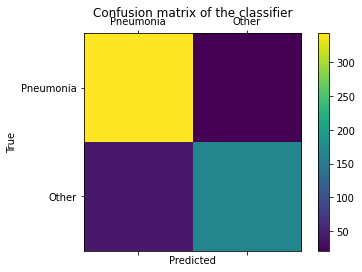

In [107]:
labels = ['Covid', 'Other']
cm = Av[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = Av[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = Av[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=0
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
At=np.zeros((nb_classes,2,2))
acc=0
i=0
B=[]
with torch.no_grad():
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)        #print(classes)#print(classes)
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        At=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+At
        B.append(f1_score(classes.numpy(), pred.numpy(), average='samples'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
        #i=i+1

#print('train accuracy', '    ',  acc/i)

In [91]:
print('train data ')
print(A)
print('F1 score')
print(np.mean(B))


train data 
[[[5.945e+03 1.000e+00]
  [1.330e+02 6.500e+01]]

 [[1.933e+03 2.500e+02]
  [4.490e+02 3.512e+03]]

 [[3.740e+03 2.210e+02]
  [4.360e+02 1.747e+03]]]
F1 score
0.8509114583333334


[[5945.    0.]
 [ 121.   78.]]


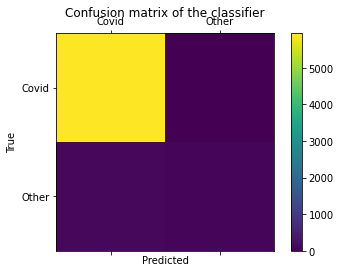

[[1909.  272.]
 [ 437. 3526.]]


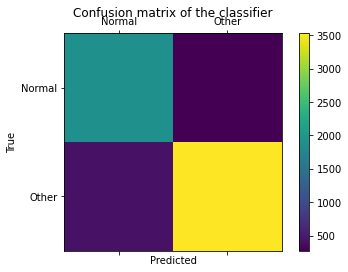

[[3760.  203.]
 [ 434. 1747.]]


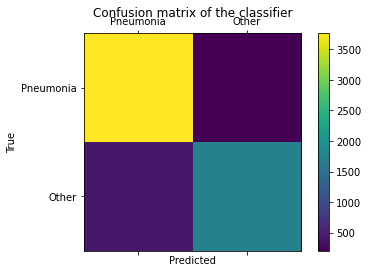

In [109]:

labels = ['Covid', 'Other']
cm = At[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = At[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = At[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 1. Import dependencies

In [2]:
from google.colab import drive
drive.mount('./gdrive')


Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [0]:
#!unzip "./gdrive/My Drive/A_05_Part_02_Dataset.zip" -d "./gdrive/My Drive/Assignment_05_dataset"

In [4]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import sys

In [0]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader ,random_split
from torch.nn import functional as F
import torch.optim as optim


In [0]:
#dir(models)

In [8]:
torch.__version__

'1.5.0+cu101'

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
data_dir_tr = "./gdrive/My Drive/Assign_5_Augm/train_aug"
data_dir_vl = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset"

### 2. Create PyTorch data generators

In [11]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
batch=64
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(data_dir_vl+'/Train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(data_dir_vl+'/Validation', data_transforms['validation'])
}
#image_datasets['validation'].class_to_idx={'covid-19': [1,0,0], 'normal': [0,1,0], 'pneumonia': [0,0,1]}
A=image_datasets['validation']
print(A)
dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4),
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4)
}
print(image_datasets['train'].class_to_idx)


def one_hot(x, class_count):
    return torch.eye(class_count).to(device)[x,:]
len(image_datasets['train'])
#for inputs, labels in dataloaders['validation']:
 #print(labels.data)
 #x = labels
 #class_count = 3
 
 #y = torch.LongTensor(128,1).random_() % 3
# One hot encoding buffer that you create out of the loop and just keep reusing
 #y_onehot = torch.FloatTensor(batch, 3)
 #y_onehot.zero_()
 #y_onehot.scatter_(1, labels, 1)t5
 #print(one_hot(x,class_count))
#list(zip(image_datasets['train'].class_to_idx))
#len(image_datasets['validation'])

Dataset ImageFolder
    Number of datapoints: 628
    Root location: ./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/Validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'covid-19': 0, 'normal': 1, 'pneumonia': 2}


6200

### 3. Create the network

In [31]:
model = models.vgg16(pretrained=True).to(device)

num_features = model.classifier[0].in_features
for param in model.parameters():
  param.requires_grad=False
model.classifier=nn.Sequential( nn.Linear(num_features,5000),
                                nn.LeakyReLU(),
                                nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,120),
                                nn.LeakyReLU(),
                                nn.Linear(120,3)).to(device)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
#criterion = nn.CrossEntropyLoss()
pos_weight = torch.ones([batch]).to(device)
criterion=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#optimizer = optim.SGD(model.classifier.parameters(),lr=0.001, momentum=0.9)
#for param in filter(lambda p: p.requires_grad, model.parameters()):
 # print(param.requires_grad)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)

### 4. Train the model

In [0]:
#batch=128
def train_model(model, Focalloss, optimizer, num_epochs=3):
    loss_train=[]
    loss_val=[]
    acc_train=[]
    acc_val=[]
    Epochs=[]
    for epoch in range(num_epochs):
        print('Epoch ' ,epoch+1,'/',num_epochs)
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            i=0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # print(labels)
                # One hot encoding buffer that you create out of the loop and just keep reusing
                #y_onehot = torch.FloatTensor(batch, 3).to(device)
                #y_onehot.zero_().to(device)
                #y_onehot.scatter_(1, labels, 1).to(device)
                onehot=one_hot(labels,3)
                #onehot[onehot[0:batch]==torch.FloatTensor([1,0,0]).to(device)]=(torch.FloatTensor([1,0,1]).clone()).to(device)
                #y[y[0:200]==torch.FloatTensor([1., 0., 0.]).to(device)]=torch.FloatTensor([1., 0., 1.]).to(device)
                #onehot=torch.where(onehot[0:batch]==torch.FloatTensor([ 1.,  0.,   0.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),onehot)
                for a in range(len(labels)):
                    if torch.equal(onehot[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
                        onehot[a]=torch.FloatTensor([1., 0., 1.]).to(device)
                #for i in range(len(onehot)):
                #print(onehot[:])
                #print(onehot.dtype,'hotcoding')
                i=i+1
                #for inputs, labels in dataloaders['validation']:
                #print(labels.data)


                outputs = model(inputs)
                #print(outputs.shape)
                loss = criterion(outputs.T, onehot.T)
                #print(loss,'  loss')
                print('\r ',i,'  ','loss  ',loss,end='')
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                m=torch.nn.Sigmoid()
                preds = m(outputs).data>0.5
                #print(preds.shape,'\n')
                preds=preds*1
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds[0:batch] == (onehot[0:batch]))/3
            
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.float() / len(image_datasets[phase])
            if phase == 'train':
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
                
            #Epochs,append(epoch_acc)

            print('  ','{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss.item(),
                                                        epoch_acc.item()))
    
    A=plt.figure(1)
    #plt.plot(it,Loss,label='CE')
    plt.plot(range(num_epochs),acc_train,'r--',label='Training Accuracy')
    plt.plot(range(num_epochs),acc_val,'g--',label='Val Accuracy')
    #print(Loss)
    A.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    g = plt.figure(2)
    plt.plot(range(num_epochs),loss_train,'r--',label='Training Loss')
    plt.plot(range(num_epochs),loss_val,'g--',label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    g.legend()
    #g.savefig(('LOss'.png'),dpi=1200)        
    return model


In [34]:
y = torch.FloatTensor(200,3).random_().to(device)
#print(y)
print(y[0:5])
q =[[0,1,2],[3,0,4],[5,6,0]]
tense_tensor = torch.tensor(q)


tensor([[13434204.,  8256442.,  3570505.],
        [ 8844459., 12664341.,  5491954.],
        [13293056.,  8768393.,  6054291.],
        [ 3509636.,  6109013., 11298027.],
        [ 4541472.,  8052719.,   127205.]], device='cuda:0')


In [0]:

#y[y[0:200]==torch.FloatTensor([16583221., 12498836., 11103416.])]=torch.FloatTensor([1.,  0., 1.]).to(device)
#print(torch.where(y[0:200]==torch.FloatTensor([ 803131.,  5802761.,   894371.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),y))

In [36]:
len(image_datasets['train'])

6200

[link text](https://)

Epoch  1 / 15
----------
  96    loss   tensor(0.1887, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.4135, acc: 0.8602
  9    loss   tensor(0.1387, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.2130, acc: 0.8424
Epoch  2 / 15
----------
  96    loss   tensor(0.1441, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.2092, acc: 0.9084
  9    loss   tensor(0.1264, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.1960, acc: 0.8424
Epoch  3 / 15
----------
  96    loss   tensor(0.1065, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.1890, acc: 0.9156
  9    loss   tensor(0.2709, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   validation loss: 0.1959, acc: 0.8487
Epoch  4 / 15
----------
  96    loss   tensor(0.2011, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)   train loss: 0.178

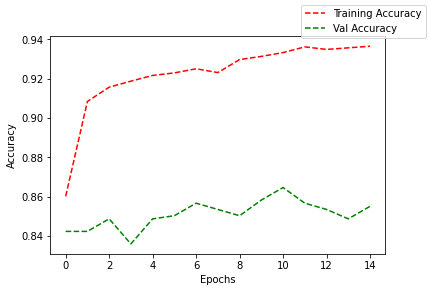

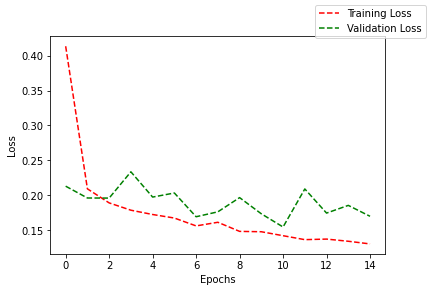

In [37]:
model_trained = train_model(model, criterion, optimizer, num_epochs=15)

### 5. Save and load the model

In [0]:
torch.save(model_trained.state_dict(), './gdrive/My Drive/Assignment_05/VGG_Final_BCE.h5')

In [39]:
model = models.vgg16(pretrained=True).to(device)
num_features = model.classifier[0].in_features
model.classifier=nn.Sequential( nn.Linear(num_features,5000),
                                nn.LeakyReLU(),
                                nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,120),
                                nn.LeakyReLU(),
                                nn.Linear(120,3)).to(device)

model.load_state_dict(torch.load('./gdrive/My Drive/Assignment_05/VGG_Final_BCE.h5'))
model.eval()
print('testing')

testing


### 6. Make predictions on sample test images

In [40]:
import torch
from torchvision import datasets

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/test"
dataset = ImageFolderWithPaths(data_dir) # our custom dataset
dataloader = DataLoader(dataset)
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_data = ImageFolderWithPaths(data_dir_vl + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

class_names = test_data.classes
score=[]
name=[]
print(class_names)
for inputs, labels, paths in testloader:
    # use the above variables freely
    model.eval()
    nm=os.path.basename(os.path.normpath(paths[0]))
    image=inputs.to(device)
    outputs = (model(image))
    gt=outputs.detach().to('cpu').numpy()
    score.append((gt[0]>0.5)*1)
    name.append(nm)
a=np.matrix(name)
b=np.asarray(score)#.reshape(0,-1)
res = np.concatenate((a.T, b[:,0:1]), axis=1)
res = np.concatenate((res,b[:,2:3]),axis=1)
res = np.concatenate((res,b[:,1:2]),axis=1)
print(res)
np.savetxt("./gdrive/My Drive/Assignment_05/VGG_final_BCE.csv", res,delimiter=',',  fmt='%s')

['Test']
[['0.png' '0' '0' '1']
 ['1.png' '0' '0' '1']
 ['10.png' '0' '0' '1']
 ...
 ['97.png' '0' '1' '0']
 ['98.png' '0' '0' '1']
 ['99.png' '0' '0' '1']]


In [44]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=[]
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
Av=np.zeros((nb_classes,2,2))
acc=0
i=0
with torch.no_grad():
    for inputs, labels in dataloaders['validation']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)  
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        i=1+i
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        Av=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+Av
        B.append(f1_score(classes.numpy(), pred.numpy(), average='macro'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
print('Validation data ')
print(Av)
print('F1 score')
print(np.mean(B))

Validation data 
[[[5934.   11.]
  [  37.  162.]]

 [[2039.  141.]
  [ 274. 3690.]]

 [[3879.   85.]
  [ 274. 1906.]]]
F1 score
0.7553373995400032


[[551.   0.]
 [ 14.  11.]]


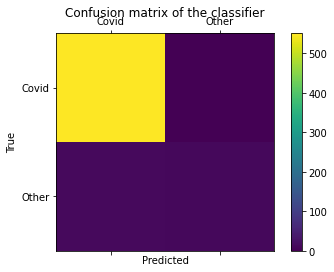

[[182.  21.]
 [ 28. 345.]]


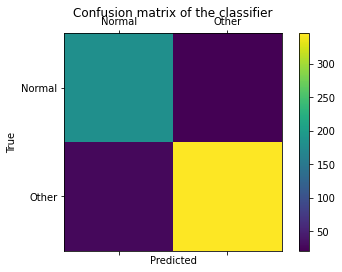

[[364.   9.]
 [ 36. 167.]]


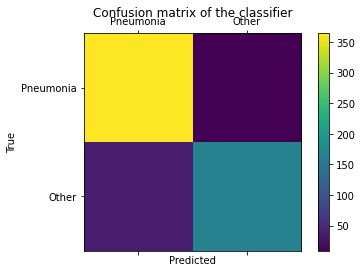

In [49]:
labels = ['Covid', 'Other']
cm = Av[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = Av[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = Av[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=0
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
At=np.zeros((nb_classes,2,2))
acc=0
i=0
B=[]
with torch.no_grad():
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)  
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        At=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+At
        B.append(f1_score(classes.numpy(), pred.numpy(), average='macro'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
        #i=i+1

#print('train accuracy', '    ',  acc/i)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [52]:
print('train data ')
print(At)
print('F1 score')
print(np.mean(B))


train data 
[[[5933.   11.]
  [  37.  163.]]

 [[2038.  144.]
  [ 273. 3689.]]

 [[3874.   88.]
  [ 276. 1906.]]]
F1 score
0.8494061193014835


[[5931.   16.]
 [  42.  155.]]


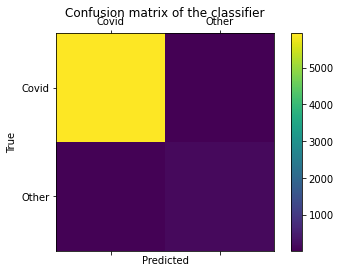

[[2043.  134.]
 [ 286. 3681.]]


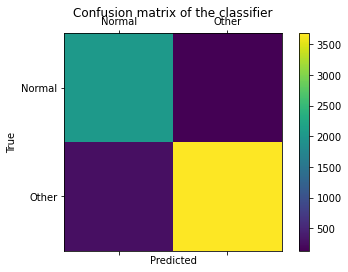

[[3882.   85.]
 [ 275. 1902.]]


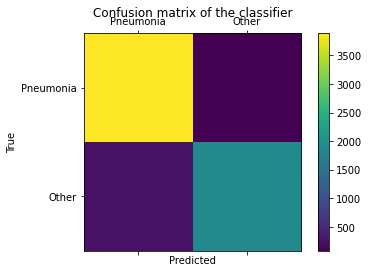

In [53]:

labels = ['Covid', 'Other']
cm = At[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = At[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = At[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 1. Import dependencies

In [15]:
from google.colab import drive
drive.mount('./gdrive')


Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [0]:
#!unzip "./gdrive/My Drive/A_05_Part_02_Dataset.zip" -d "./gdrive/My Drive/Assignment_05_dataset"

In [17]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==1.4.0 from http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu92/torch-1.4.0-cp36-cp36m-linux_x86_64.whl


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import sys

In [0]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader ,random_split
from torch.nn import functional as F
import torch.optim as optim


In [0]:
#dir(models)

In [21]:
torch.__version__

'1.5.0+cu101'

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
data_dir_tr = "./gdrive/My Drive/Assign_5_Augm/train_aug"
data_dir_vl = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset"

### 2. Create PyTorch data generators

In [24]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
batch=64
data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    'train': 
    datasets.ImageFolder(data_dir_vl+'/Train', data_transforms['train']),
    'validation': 
    datasets.ImageFolder(data_dir_vl+'/Validation', data_transforms['validation'])
}
#image_datasets['validation'].class_to_idx={'covid-19': [1,0,0], 'normal': [0,1,0], 'pneumonia': [0,0,1]}
A=image_datasets['validation']
print(A)
dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4),
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=batch,
                                shuffle=True,drop_last=True,num_workers=4)
}
print(image_datasets['train'].class_to_idx)


def one_hot(x, class_count):
    return torch.eye(class_count).to(device)[x,:]
len(image_datasets['train'])
#for inputs, labels in dataloaders['validation']:
 #print(labels.data)
 #x = labels
 #class_count = 3
 
 #y = torch.LongTensor(128,1).random_() % 3
# One hot encoding buffer that you create out of the loop and just keep reusing
 #y_onehot = torch.FloatTensor(batch, 3)
 #y_onehot.zero_()
 #y_onehot.scatter_(1, labels, 1)t5
 #print(one_hot(x,class_count))
#list(zip(image_datasets['train'].class_to_idx))
#len(image_datasets['validation'])

Dataset ImageFolder
    Number of datapoints: 628
    Root location: ./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/Validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'covid-19': 0, 'normal': 1, 'pneumonia': 2}


6200

### 3. Create the network

In [25]:
model = models.vgg16(pretrained=True).to(device)

num_features = model.classifier[0].in_features
for param in model.parameters():
  param.requires_grad=False
model.classifier=nn.Sequential( nn.Linear(num_features,5000),
                                nn.LeakyReLU(),
                                nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,120),
                                nn.LeakyReLU(),
                                nn.Linear(120,3)).to(device)
print(model)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [0]:
def Focalloss(x,y,alpha=0.2,gamma=2):
  pos_weight = torch.ones([batch]).to(device)
  BCE=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
  BCE_LOSS=BCE(x,y)
  pt=torch.exp(-BCE_LOSS)
  FL=alpha*BCE_LOSS*(1-pt)**gamma
  return FL




In [0]:
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.classifier.parameters(),lr=0.001, momentum=0.9)
#for param in filter(lambda p: p.requires_grad, model.parameters()):
 # print(param.requires_grad)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=0.001)

### 4. Train the model

In [0]:
#batch=128
def train_model(model, Focalloss, optimizer, num_epochs=3):
    loss_train=[]
    loss_val=[]
    acc_train=[]
    acc_val=[]
    Epochs=[]
    for epoch in range(num_epochs):
        print('Epoch ' ,epoch+1,'/',num_epochs)
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            i=0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # print(labels)
                # One hot encoding buffer that you create out of the loop and just keep reusing
                #y_onehot = torch.FloatTensor(batch, 3).to(device)
                #y_onehot.zero_().to(device)
                #y_onehot.scatter_(1, labels, 1).to(device)
                onehot=one_hot(labels,3)
                #onehot[onehot[0:batch]==torch.FloatTensor([1,0,0]).to(device)]=(torch.FloatTensor([1,0,1]).clone()).to(device)
                #y[y[0:200]==torch.FloatTensor([1., 0., 0.]).to(device)]=torch.FloatTensor([1., 0., 1.]).to(device)
                #onehot=torch.where(onehot[0:batch]==torch.FloatTensor([ 1.,  0.,   0.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),onehot)
                for a in range(len(labels)):
                    if torch.equal(onehot[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
                        onehot[a]=torch.FloatTensor([1., 0., 1.]).to(device)                
                #for i in range(len(onehot)):
                #print(onehot[:])
                #print(onehot.dtype,'hotcoding')
                i=i+1
                #for inputs, labels in dataloaders['validation']:
                #print(labels.data)


                outputs = model(inputs)
                #print(outputs.shape)
                loss = Focalloss(outputs.T, onehot.T,alpha=0.5,gamma=2)
                #print(loss,'  loss')
                print('\r ',i,'  ','loss  ',loss,end='')
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                m=torch.nn.Sigmoid()
                preds = m(outputs).data>0.5
                #print(preds.shape,'\n')
                preds=preds*1
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds[0:batch] == (onehot[0:batch]))/3
            
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.float() / len(image_datasets[phase])
            if phase == 'train':
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
                
            #Epochs,append(epoch_acc)

            print('  ','{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss.item(),
                                                        epoch_acc.item()))
    
    A=plt.figure(1)
    #plt.plot(it,Loss,label='CE')
    plt.plot(range(num_epochs),acc_train,'r--',label='Training Accuracy')
    plt.plot(range(num_epochs),acc_val,'g--',label='Val Accuracy')
    #print(Loss)
    A.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    g = plt.figure(2)
    plt.plot(range(num_epochs),loss_train,'r--',label='Training Loss')
    plt.plot(range(num_epochs),loss_val,'g--',label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    g.legend()
    #g.savefig(('LOss'.png'),dpi=1200)        
    return model


In [36]:
y = torch.FloatTensor(200,3).random_().to(device)
#print(y)
print(y[0:5])
q =[[0,1,2],[3,0,4],[5,6,0]]
tense_tensor = torch.tensor(q)


tensor([[ 7071117., 10547335.,  7309415.],
        [ 1335422., 16198869.,  2847427.],
        [  966444., 12449033., 15464826.],
        [10161559., 11820689., 13567115.],
        [10349463.,  7062630.,  1135395.]], device='cuda:0')


In [0]:

#y[y[0:200]==torch.FloatTensor([16583221., 12498836., 11103416.])]=torch.FloatTensor([1.,  0., 1.]).to(device)
#print(torch.where(y[0:200]==torch.FloatTensor([ 803131.,  5802761.,   894371.]).to(device),torch.FloatTensor([1.,  0., 1.]).to(device),y))

In [38]:
len(image_datasets['train'])

6200

[link text](https://)

Epoch  1 / 15
----------
  96    loss   tensor(0.0180, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0088, acc: 0.8874
  9    loss   tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0042, acc: 0.8408
Epoch  2 / 15
----------
  96    loss   tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0050, acc: 0.9008
  9    loss   tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0082, acc: 0.8471
Epoch  3 / 15
----------
  96    loss   tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0040, acc: 0.9085
  9    loss   tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0036, acc: 0.8487
Epoch  4 / 15
----------
  96    loss   tensor(0.0008, device='cuda:0', grad_fn=<MulBackward0>)   train loss: 0.0039, acc: 0.9124
  9    loss   tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)   validation loss: 0.0039, acc: 0.8535
Epoch  5 / 15
----------
  96    loss   tens

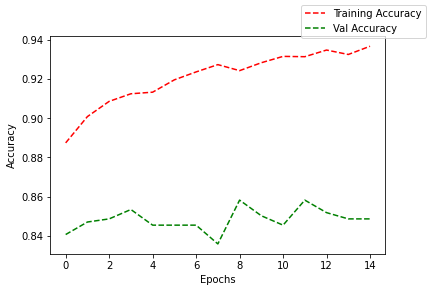

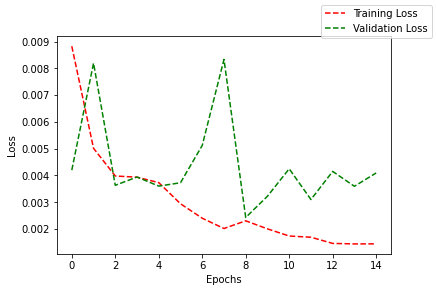

In [39]:
model_trained = train_model(model, Focalloss, optimizer, num_epochs=15)

### 5. Save and load the model

In [0]:
torch.save(model_trained.state_dict(), './gdrive/My Drive/Assignment_05/VGG_Final_FL.h5')

In [41]:
model = models.vgg16(pretrained=True).to(device)
num_features = model.classifier[0].in_features
model.classifier=nn.Sequential( nn.Linear(num_features,5000),
                                nn.LeakyReLU(),
                                nn.Dropout(p=0.5,inplace=False),
                                nn.Linear(5000,120),
                                nn.LeakyReLU(),
                                nn.Linear(120,3)).to(device)

model.load_state_dict(torch.load('./gdrive/My Drive/Assignment_05/VGG_Final_FL.h5'))
model.eval()
print('testing')

testing


### 6. Make predictions on sample test images

In [43]:
import torch
from torchvision import datasets

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = "./gdrive/My Drive/Assignment_dataset/A_05_Part_02_Dataset/test"
dataset = ImageFolderWithPaths(data_dir) # our custom dataset
dataloader = DataLoader(dataset)
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_data = ImageFolderWithPaths(data_dir_vl + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

class_names = test_data.classes
score=[]
name=[]
print(class_names)
for inputs, labels, paths in testloader:
    # use the above variables freely
    model.eval()
    nm=os.path.basename(os.path.normpath(paths[0]))
    image=inputs.to(device)
    outputs = (model(image))
    gt=outputs.detach().to('cpu').numpy()
    score.append((gt[0]>0.5)*1)
    name.append(nm)
a=np.matrix(name)
b=np.asarray(score)#.reshape(0,-1)
res = np.concatenate((a.T, b[:,0:1]), axis=1)
res = np.concatenate((res,b[:,2:3]),axis=1)
res = np.concatenate((res,b[:,1:2]),axis=1)
print(res)
np.savetxt("./gdrive/My Drive/Assignment_05/VGG_Final_FL.csv", res,delimiter=',',  fmt='%s')

['Test']
[['0.png' '0' '0' '1']
 ['1.png' '0' '0' '1']
 ['10.png' '0' '0' '1']
 ...
 ['97.png' '0' '1' '0']
 ['98.png' '0' '0' '1']
 ['99.png' '0' '0' '1']]


In [51]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=[]
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
Av=np.zeros((nb_classes,2,2))
acc=0
i=0
with torch.no_grad():
    for inputs, labels in dataloaders['validation']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)  
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        i=1+i
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        Av=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+Av
        B.append(f1_score(classes.numpy(), pred.numpy(), average='macro'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
print('Validation data ')
print(Av)
print('F1 score')
print(np.mean(B))

Validation data 
[[[5.941e+03 3.000e+00]
  [9.600e+01 1.040e+02]]

 [[1.948e+03 2.370e+02]
  [1.550e+02 3.804e+03]]

 [[3.923e+03 3.600e+01]
  [4.580e+02 1.727e+03]]]
F1 score
0.7405642133415796


[[551.   0.]
 [ 15.  10.]]


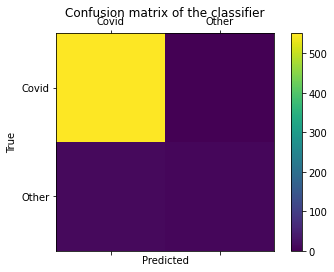

[[172.  34.]
 [ 15. 355.]]


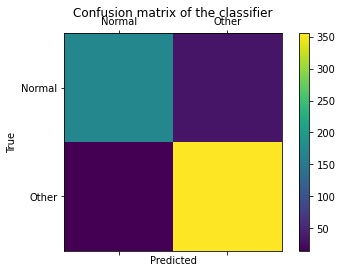

[[368.   2.]
 [ 52. 154.]]


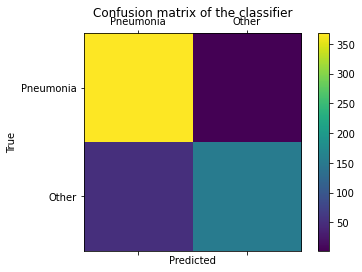

In [53]:
labels = ['Covid', 'Other']
cm = Av[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = Av[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = Av[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
nb_classes = 3
B=0
confusion_matrix = torch.zeros(nb_classes, nb_classes)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
At=np.zeros((nb_classes,2,2))
acc=0
i=0
B=[]
with torch.no_grad():
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        onehot=one_hot(labels,3)
        classes=onehot
        for a in range(len(labels)):
          if torch.equal(classes[a], torch.FloatTensor([ 1.,  0.,   0.]).to(device)):
             classes[a]=torch.FloatTensor([1., 0., 1.]).to(device)
        classes=classes.long().cpu()
        pred=model(inputs)>0.5
        pred=pred*1
        #pred=pred.cpu()#detach().to('cpu').numpy
        pred=pred.long().cpu()
        At=multilabel_confusion_matrix(classes.numpy(), pred.numpy())+At
        B.append(f1_score(classes.numpy(), pred.numpy(), average='macro'))
        #acc=accuracy_score(classes.numpy(), pred.numpy())+acc
        #i=i+1

#print('train accuracy', '    ',  acc/i)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [55]:
print('train data ')
print(At)
print('F1 score')
print(np.mean(B))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
plt.show()

train data 
[[[5.941e+03 3.000e+00]
  [9.600e+01 1.040e+02]]

 [[1.948e+03 2.370e+02]
  [1.550e+02 3.804e+03]]

 [[3.923e+03 3.600e+01]
  [4.580e+02 1.727e+03]]]
F1 score
0.7937893013995542


[[5.941e+03 3.000e+00]
 [9.200e+01 1.080e+02]]


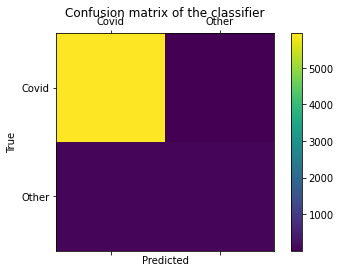

[[1956.  225.]
 [ 157. 3806.]]


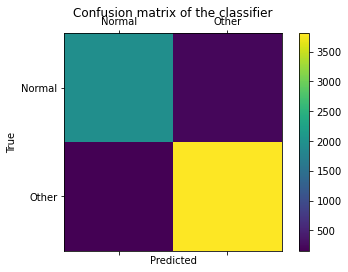

[[3944.   19.]
 [ 430. 1751.]]


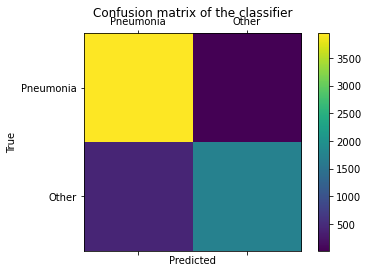

In [56]:

labels = ['Covid', 'Other']
cm = At[0,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Normal', 'Other']
cm = At[1,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
labels=['Pneumonia', 'Other']
cm = At[2,:,:]
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()